In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
from wordcloud import WordCloud

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D

In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/fakenews_df.csv')

In [5]:
data.sample(5)

,text,class
13905,north koreas wounded defector nice guy likes c...,1
13454,kremlin calls us congress move rt tv station u...,1
17416,kenyan opposition leader odinga withdrew vote ...,1
13702,kenya president uhuru kenyatta sworn second fi...,1
36209,hollywood porn director makes chappaquiddick m...,0


In [6]:
import gensim

In [7]:
y = data["class"].values

In [8]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
X = [d.split() for d in data['text'].tolist()] #list of lists

In [10]:
print(X[0])

['us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'head', 'conservative', 'republican', 'faction', 'us', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', '2018', 'keeping', 'sharp', 'pivot', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'cbs', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'big', 'budget', 'increase', 'military', 'spending', 'democrats', 'also', 'want', 'proportional', 'increases', 'n

In [11]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X,size=DIM,window=10,min_count=1)

In [12]:
len(w2v_model.wv.vocab)

231486

In [17]:
w2v_model.wv.most_similar('us')

[('american', 0.567824125289917),
 ('httpswwwyoutubecomwatchvz3j8cfq6vuuin', 0.47190427780151367),
 ('countrys', 0.4488561749458313),
 ('involvedmedical', 0.4466524124145508),
 ('iranyoutube', 0.4293958842754364),
 ('intermediated', 0.42902326583862305),
 ('490000', 0.4283984899520874),
 ('washingtons', 0.42569321393966675),
 ('reinterpreted', 0.42492812871932983),
 ('marginamong', 0.4235289990901947)]

In [18]:
w2v_model.wv.most_similar('modi')

[('narendra', 0.8341748714447021),
 ('modis', 0.7140747308731079),
 ('indias', 0.6628238558769226),
 ('india', 0.6274677515029907),
 ('najib', 0.5674504041671753),
 ('hindunationalist', 0.5550987720489502),
 ('beijings', 0.5542279481887817),
 ('phuc', 0.5505544543266296),
 ('usjapan', 0.5481256246566772),
 ('dudeplomacy', 0.5376136302947998)]

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [21]:
X = tokenizer.texts_to_sequences(X)

In [25]:
tokenizer.word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'state': 8,
 'new': 9,
 'also': 10,
 'house': 11,
 'donald': 12,
 'states': 13,
 'clinton': 14,
 'obama': 15,
 'government': 16,
 'republican': 17,
 'could': 18,
 'white': 19,
 'told': 20,
 'united': 21,
 'like': 22,
 'campaign': 23,
 'news': 24,
 'last': 25,
 'election': 26,
 'two': 27,
 'time': 28,
 'party': 29,
 'first': 30,
 'former': 31,
 'hillary': 32,
 'even': 33,
 'year': 34,
 'country': 35,
 'video': 36,
 'years': 37,
 'many': 38,
 'media': 39,
 'security': 40,
 'may': 41,
 'say': 42,
 'political': 43,
 'national': 44,
 'police': 45,
 'get': 46,
 'law': 47,
 'made': 48,
 'court': 49,
 'make': 50,
 'american': 51,
 'republicans': 52,
 'since': 53,
 'going': 54,
 'percent': 55,
 'trumps': 56,
 'bill': 57,
 'presidential': 58,
 'back': 59,
 'says': 60,
 'russia': 61,
 'north': 62,
 'senate': 63,
 'support': 64,
 'democratic': 65,
 'administration': 66,
 'vote': 67,
 'america': 68,
 'week': 

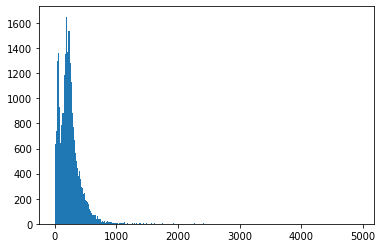

In [26]:
plt.hist([len(x) for x in X],bins = 500)
plt.show()

In [27]:
nos = np.array([len(x) for x in X ])
len(nos[nos>1000])

304

In [28]:
max_len = 1000
X = pad_sequences(X,maxlen=max_len)

In [30]:
X.shape

(44897, 1000)

In [49]:
vocab_size = len(tokenizer.word_index)+1 # for unknown words
vocab = tokenizer.word_index

In [32]:
vocab_size

231487

In [47]:
def get_weights(model):
  weight_matrix = np.zeros((vocab_size,DIM))
  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]   # initial weights assigned as w2v veector
  return weight_matrix

In [51]:
embedding_vectors = get_weights(w2v_model)

In [52]:
embedding_vectors.shape

(231487, 100)

In [54]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights = [embedding_vectors],input_length=max_len,trainable = False))
model.add(LSTM(units = 128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['acc'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         23148700  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 23,266,077
Trainable params: 117,377
Non-trainable params: 23,148,700
_________________________________________________________________


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [58]:
model.fit(X_train,y_train,validation_split=0.3,epochs = 6)

Epoch 1/6
737/737 [==============================] - 125s 170ms/step - loss: 0.1033 - acc: 0.9658 - val_loss: 0.0580 - val_acc: 0.9809
Epoch 2/6
737/737 [==============================] - 123s 167ms/step - loss: 0.0635 - acc: 0.9781 - val_loss: 0.0482 - val_acc: 0.9853
Epoch 3/6
737/737 [==============================] - 124s 168ms/step - loss: 0.0322 - acc: 0.9894 - val_loss: 0.0319 - val_acc: 0.9883
Epoch 4/6
737/737 [==============================] - 124s 169ms/step - loss: 0.0208 - acc: 0.9930 - val_loss: 0.0380 - val_acc: 0.9872
Epoch 5/6
737/737 [==============================] - 124s 169ms/step - loss: 0.0157 - acc: 0.9954 - val_loss: 0.0444 - val_acc: 0.9855
Epoch 6/6
737/737 [==============================] - 124s 169ms/step - loss: 0.0186 - acc: 0.9938 - val_loss: 0.0300 - val_acc: 0.9899


In [60]:
y_pred = (model.predict(X_test)>=0.5).astype(int)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9907349665924277